In [61]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

In [37]:
data = pd.read_csv('Taoyuan_attractions.csv')
data.head()

,InfoId,TYWebsite,Name,Toldescribe,Add,Zipcode,Opentime,Px,Py,Website,Parkinginfo,Ticketinfo,Remarks,Tel,Fax,Changetime
0,1186,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,彩韻廣場,本廣場位於進入桃園市政中心的門戶，水舞緞裝置藝術以展開雙臂、舞動柔軟緞帶之形象，呈現活潑與歡...,330 桃園市桃園區國際路二段與大興西路三段交叉口,330,24小時,121.28688,25.00260,NaN,NaN,NaN,NaN,NaN,NaN,2021/02/05 17:18:44
1,405,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,御成路古道,御成路古道為大溪河西地區三大古道之一(另二條為齋明寺古道、蟠龍崎古道)，由「御成｣一詞不難見...,335 桃園市大溪區瑞安路一段268號進入或桃園市國防大學中正嶺旁進入,335,星期日：24 小時營業、星期一：24 小時營業、星期二：24 小時營業、星期三：24 小時營...,121.27699,24.88432,NaN,路邊停車,免費,．4、5月為桐花期\n．山區蚊蟲多，請著透氣長袖衣褲,NaN,NaN,2022/03/06 12:02:27
2,1175,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,水牛書店,踏進小書店時，三五個孩子正在進行一場桌遊大賽，氣氛熱烈，不時傳來歡笑聲。印象中書店都是「無聲...,327 桃園市新屋區中興路 55 號,327,星期日：休息、星期一：休息、星期二：休息、星期三：休息、星期四：09:00 – 17:00、...,121.10289,24.97150,NaN,路邊停車,NaN,NaN,03-4870393,03-4871096,2022/11/01 16:29:51
3,1575,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,自然接觸保養品亮點體驗園,「自然接觸保養品體驗園區」是結合天然、科技、專業保養品與藝術及多元角色攝影場景的觀光工廠，館...,326 桃園市楊梅區楊湖路一段351號,326,星期日：09:00 – 17:00、星期一：09:00 – 17:00、星期二：09:00 ...,121.13409,24.91186,NaN,NaN,NaN,參觀採預約制,03-4789999,NaN,2022/11/01 16:30:22
4,1641,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,大溪木藝生態博物館﹣工藝交流館及工藝基地,《工藝基地》 「工藝基地」由六連棟等三棟歷史建築再利用，作為工藝師駐村空間、工藝教室、木工場...,335 桃園市大溪區普濟路13巷5.7.9.11.13.15號,335,星期日：09:30 – 17:00、星期一：休息、星期二：09:30 – 17:00、星期三...,121.28685,24.88002,https://wem.tycg.gov.tw/index.jsp,1. 橋頭停車場有大型車15格，小型車418格\n2. 公所前停車場有小型車45格\n3. ...,免費,＊大溪木藝生態博物館老城區館舍導覽資訊\n■於大溪歷史館前集合(大溪區普濟路23號）\n■例...,03-3888600,NaN,2022/11/01 16:30:18


In [38]:
documents = ['我是臺灣師範大學科技系114級林逸豪']
for sentence in documents:
    seg_list = jieba.cut(sentence)#用jieba做cut斷詞
    print('/'.join(seg_list))#印出來的內容用斜線隔開

我/是/臺/灣師/範大學/科技系/114級/林逸豪


In [39]:
jieba.load_userdict('./name.txt')#建立斷詞文本

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺/灣師/範大學/科技系/114級/林逸豪


In [40]:
data['seg'] = ""
data.head()

,InfoId,TYWebsite,Name,Toldescribe,Add,Zipcode,Opentime,Px,Py,Website,Parkinginfo,Ticketinfo,Remarks,Tel,Fax,Changetime,seg
0,1186,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,彩韻廣場,本廣場位於進入桃園市政中心的門戶，水舞緞裝置藝術以展開雙臂、舞動柔軟緞帶之形象，呈現活潑與歡...,330 桃園市桃園區國際路二段與大興西路三段交叉口,330,24小時,121.28688,25.00260,NaN,NaN,NaN,NaN,NaN,NaN,2021/02/05 17:18:44,
1,405,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,御成路古道,御成路古道為大溪河西地區三大古道之一(另二條為齋明寺古道、蟠龍崎古道)，由「御成｣一詞不難見...,335 桃園市大溪區瑞安路一段268號進入或桃園市國防大學中正嶺旁進入,335,星期日：24 小時營業、星期一：24 小時營業、星期二：24 小時營業、星期三：24 小時營...,121.27699,24.88432,NaN,路邊停車,免費,．4、5月為桐花期\n．山區蚊蟲多，請著透氣長袖衣褲,NaN,NaN,2022/03/06 12:02:27,
2,1175,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,水牛書店,踏進小書店時，三五個孩子正在進行一場桌遊大賽，氣氛熱烈，不時傳來歡笑聲。印象中書店都是「無聲...,327 桃園市新屋區中興路 55 號,327,星期日：休息、星期一：休息、星期二：休息、星期三：休息、星期四：09:00 – 17:00、...,121.10289,24.97150,NaN,路邊停車,NaN,NaN,03-4870393,03-4871096,2022/11/01 16:29:51,
3,1575,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,自然接觸保養品亮點體驗園,「自然接觸保養品體驗園區」是結合天然、科技、專業保養品與藝術及多元角色攝影場景的觀光工廠，館...,326 桃園市楊梅區楊湖路一段351號,326,星期日：09:00 – 17:00、星期一：09:00 – 17:00、星期二：09:00 ...,121.13409,24.91186,NaN,NaN,NaN,參觀採預約制,03-4789999,NaN,2022/11/01 16:30:22,
4,1641,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,大溪木藝生態博物館﹣工藝交流館及工藝基地,《工藝基地》 「工藝基地」由六連棟等三棟歷史建築再利用，作為工藝師駐村空間、工藝教室、木工場...,335 桃園市大溪區普濟路13巷5.7.9.11.13.15號,335,星期日：09:30 – 17:00、星期一：休息、星期二：09:30 – 17:00、星期三...,121.28685,24.88002,https://wem.tycg.gov.tw/index.jsp,1. 橋頭停車場有大型車15格，小型車418格\n2. 公所前停車場有小型車45格\n3. ...,免費,＊大溪木藝生態博物館老城區館舍導覽資訊\n■於大溪歷史館前集合(大溪區普濟路23號）\n■例...,03-3888600,NaN,2022/11/01 16:30:18,


In [43]:
data['seg'] = ""
data.head()

,InfoId,TYWebsite,Name,Toldescribe,Add,Zipcode,Opentime,Px,Py,Website,Parkinginfo,Ticketinfo,Remarks,Tel,Fax,Changetime,seg
0,1186,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,彩韻廣場,本廣場位於進入桃園市政中心的門戶，水舞緞裝置藝術以展開雙臂、舞動柔軟緞帶之形象，呈現活潑與歡...,330 桃園市桃園區國際路二段與大興西路三段交叉口,330,24小時,121.28688,25.00260,NaN,NaN,NaN,NaN,NaN,NaN,2021/02/05 17:18:44,
1,405,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,御成路古道,御成路古道為大溪河西地區三大古道之一(另二條為齋明寺古道、蟠龍崎古道)，由「御成｣一詞不難見...,335 桃園市大溪區瑞安路一段268號進入或桃園市國防大學中正嶺旁進入,335,星期日：24 小時營業、星期一：24 小時營業、星期二：24 小時營業、星期三：24 小時營...,121.27699,24.88432,NaN,路邊停車,免費,．4、5月為桐花期\n．山區蚊蟲多，請著透氣長袖衣褲,NaN,NaN,2022/03/06 12:02:27,
2,1175,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,水牛書店,踏進小書店時，三五個孩子正在進行一場桌遊大賽，氣氛熱烈，不時傳來歡笑聲。印象中書店都是「無聲...,327 桃園市新屋區中興路 55 號,327,星期日：休息、星期一：休息、星期二：休息、星期三：休息、星期四：09:00 – 17:00、...,121.10289,24.97150,NaN,路邊停車,NaN,NaN,03-4870393,03-4871096,2022/11/01 16:29:51,
3,1575,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,自然接觸保養品亮點體驗園,「自然接觸保養品體驗園區」是結合天然、科技、專業保養品與藝術及多元角色攝影場景的觀光工廠，館...,326 桃園市楊梅區楊湖路一段351號,326,星期日：09:00 – 17:00、星期一：09:00 – 17:00、星期二：09:00 ...,121.13409,24.91186,NaN,NaN,NaN,參觀採預約制,03-4789999,NaN,2022/11/01 16:30:22,
4,1641,https://travel.tycg.gov.tw/zh-tw/Travel/Attrac...,大溪木藝生態博物館﹣工藝交流館及工藝基地,《工藝基地》 「工藝基地」由六連棟等三棟歷史建築再利用，作為工藝師駐村空間、工藝教室、木工場...,335 桃園市大溪區普濟路13巷5.7.9.11.13.15號,335,星期日：09:30 – 17:00、星期一：休息、星期二：09:30 – 17:00、星期三...,121.28685,24.88002,https://wem.tycg.gov.tw/index.jsp,1. 橋頭停車場有大型車15格，小型車418格\n2. 公所前停車場有小型車45格\n3. ...,免費,＊大溪木藝生態博物館老城區館舍導覽資訊\n■於大溪歷史館前集合(大溪區普濟路23號）\n■例...,03-3888600,NaN,2022/11/01 16:30:18,


In [57]:
jieba.analyse.set_stop_words('stopwords.txt') 
index = 0
for documents in data['Toldescribe']:
    seg_list = jieba.analyse.extract_tags(str(documents), 150) #前150個權重最高的單詞
    data['seg'].iloc[index] = seg_list #存入seg_list
    index += 1

/var/folders/7l/568nl76j5m31gspj3w0h_7900000gn/T/ipykernel_3882/39266548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seg'].iloc[index] = seg_list #存入seg_list


In [58]:
data['seg']

0      [水舞, 市政中心, 本廣場, 進入, 門戶, 緞裝置, 藝術, 以展, 開雙臂, 舞動柔,...
1      [古道, 御成路, 大圳, 石板, 工程, 看板, 步道, 明寺, 塔前, 健行, 地區, ...
2      [書店, 水牛, 偏鄉, 閱讀, 開書店, 店內, 新屋, 除了, 文化, 一本, 整面, ...
3      [體驗, 接觸, 保養品, 藝術, 產品, 萃取, 天然, 園區, 結合, 專業, 攝影場,...
4      [工藝, 空間, 工藝師, 駐村, 傳習, 產業, 本區, 屋頂, 木藝, 大溪, 交流, ...
                             ...                        
285    [泰雅, 溫泉, 而羅浮, 遊客, 原民, 公園, 腳池, 浮里, 一帶, 蘊含, 豐富, ...
286    [蛋寶生, 卵殼, 壽尊, 最長, 日本, 應用, 技術, 國家, 成為, 技不老村, 蛋寶...
287    [中壢, 文化局, 役所, 藉由, 興建, 1941, 聯合會, 所興建, 官舍, 自日治,...
288    [影廳, 光影, 入場, 什麼, Dolby, 動漫, 電影, 影城, 第一座, 按摩椅, ...
289    [埔心, 茶葉, 歷史, 空間, 建物, 當年, 新館, 日式, 故事, 展示, 茶產業, ...
Name: seg, Length: 290, dtype: object

In [53]:
data_seg_list = data['seg'].tolist()
type(data_seg_list)

list

In [62]:
flat = [x for datalist in data_seg_list for x in datalist]
diction = Counter(flat)

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

mask = np.array(Image.open("Taoyuan.png"))
font = "/System/Library/Fonts/STHeiti Medium.ttc"

In [63]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

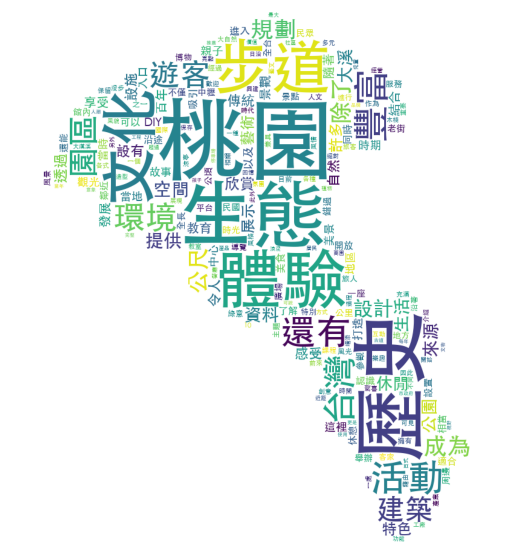

In [67]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()